In [ ]:
"""
Concentration of the norm for random vectors
Based on section 3.1 of Vershynin's 'High Dimensional Probability'

Charlotte Aten (charlotte.aten@rochester.edu) 2020
"""

In [1]:
# Imports
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class RandomVector:
    """
    A random vector.
    
    Attributes:
        components (numpy.ndarray): The components of the vector.
        dim (int): The dimension in which the vector lies.
    """
    
    def __init__(self,dim,distribution='standard_normal',mean=0,variance=1):
        """
        Args:
            dim (int): The dimension in which the vector lies.
            distribution (str): The name of the distribution according to which the vector was generated.
            mean = The mean of the distribution used.
            sqrt_variance = The variance of the distribution used.
        """
        
        # Demand that `dim` is a natural number.
        assert dim>0 and type(dim) is int
        # Let the vector keep track of its dimension. (This is the same as its length.)
        self.dim = dim
        # Make a random number generator.
        rng = np.random.default_rng()
        # Create a numpy array with `dim` many entries according to `distribution`.
        # The list of available distributions can be found here:
        # https://numpy.org/doc/stable/reference/random/generator.html
        # They are all implemented differently and as such require hardcoding here.
        if distribution == 'standard_normal':
            self.components = np.array(rng.standard_normal(dim))
        if distribution == 'wald':
            self.components = np.array(rng.wald(1,1,dim))
        # Change the mean and variance to the desired values.
        self.components = mean+np.sqrt(variance)*self.components

    def __repr__(self):
        """
        Make it so that printing the vector returns basic information about it.
        In order to see the components of a random vector `x` use `print(x.components)`.
        
        Returns:
            str: The basic information on the vector.
        """

        return 'a {}-dimensional random vector (id: {})'.format(self.dim,id(self))

    def mean(self):
        """
        Compute the mean of the random vector by taking the mean of its components.
        
        Returns:
            numpy.float64: The computed mean of the vector.
        """
        
        return self.components.mean()
    
    def norm_squared(self):
        """
        Compute the Euclidean norm squared of the vector, which is the sum of the squares of the entries.
        
        Returns:
            numpy.float64: The square of the norm of the vector.
        """

        return sum(t**2 for t in self.components)

In [3]:
print('Examples of the `RandomVector` class.\n')

print('Create a random vector `x` in 10 dimensions.')
x = RandomVector(10)
print()

print('Have `x` give us information about itself.')
print(x)
print()

print('Check the dimension of `x`.')
print(x.dim)
print()

print('View the components of `x`.')
print(x.components)
print()

print('Note that the dimension is the same as the length of the component array.')
print(x.dim)
print(len(x.components))
print()

print('Check the mean of `x` as computed from its components.')
print(x.mean())
print()

print('Create another random vector in 10 dimensions.')
y = RandomVector(10)
print()

print('Note that `x` and `y` are distinct.')
print(x)
print(y)
print()

print('We can also specify the mean and variance of our random vector.')
print('Create a 4-dimensional random vector of mean 7 and variance 1.2.')
z = RandomVector(4,mean=7,variance=1.2)
print()

print('See some basic information on `z`.')
print(z)
print()

print('Show the computed mean of `z`.')
print('Note that this is in general distinct from the specified mean.')
print(z.mean())
print()

print('Compute the norm squared of `z`.')
print(z.norm_squared())

Examples of the `RandomVector` class.

Create a random vector `x` in 10 dimensions.

Have `x` give us information about itself.
a 10-dimensional random vector (id: 140124682775232)

Check the dimension of `x`.
10

View the components of `x`.
[ 1.34370608 -0.15276631 -0.10705272 -0.26701855 -0.43144622 -0.81379094
 -1.69684125 -0.39976175  1.18351945  1.65228783]

Note that the dimension is the same as the length of the component array.
10
10

Check the mean of `x` as computed from its components.
0.031083563078890507

Create another random vector in 10 dimensions.

Note that `x` and `y` are distinct.
a 10-dimensional random vector (id: 140124682775232)
a 10-dimensional random vector (id: 140124682716688)

We can also specify the mean and variance of our random vector.
Create a 4-dimensional random vector of mean 7 and variance 1.2.

See some basic information on `z`.
a 4-dimensional random vector (id: 140124682775472)

Show the computed mean of `z`.
Note that this is in general distinc

In [4]:
def square_norm_expectation(m,dim,distribution='standard_normal',mean=0,variance=1):
    """
    Given a random vector of dimension `dim` whose entries are random variables with zero means and unit variances we are told that the expected value of the norm squared is `dim`.
    This function tests this claim.

    Args:
        m (int): The number of vectors we should use in our test.
        dim (int): The dimension of the ambient real vector space.
        distribution (str): The name of the distribution according to which the vector was generated.
        mean = The mean of the distribution used.
        variance = The variance of the distribution used.

    Returns:
        numpy.float64: The approximate expectation of the norm squared of such a random vector.
    """
    
    # Create a set of `m` random vectors in the appropriate space.
    vectors = frozenset(RandomVector(dim,distribution,mean,variance) for i in range(m))
    # Make a tuple out of the norms squared of these vectors.
    norms_squared = tuple(x.norm_squared() for x in vectors)
    # Compute the average (counting measure expectation) and return it.
    return sum(norms_squared)/m

Examples of the `square_norm_expectation` function.

Compute the approximate expectation of the norm squared of a random vector with zero means and unit variances from the normal distribution.
In this case we use 10000 samples in a 17 dimensional space.
17.05514465391004

We plot the computed expectation obtained from 1000 samples for various choices of `dim` from 1 to 30.


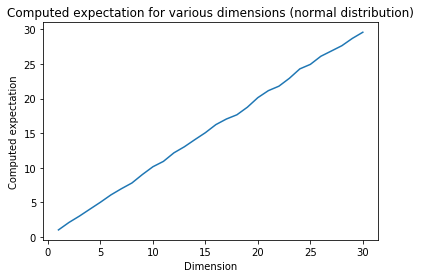

We can also use a different mean, say 10 rather than 0.


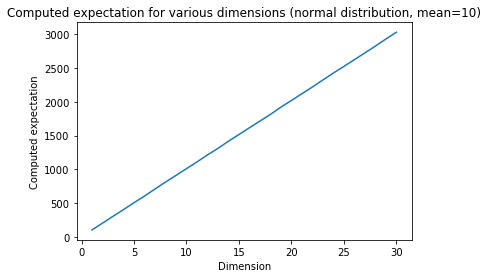

Other distributions also give different results.


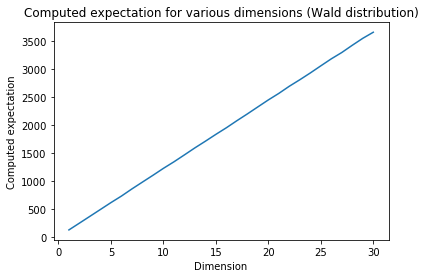

In [5]:
print('Examples of the `square_norm_expectation` function.\n')

print('Compute the approximate expectation of the norm squared of a random vector with zero means and unit variances from the normal distribution.')
print('In this case we use 10000 samples in a 17 dimensional space.')
print(square_norm_expectation(1000,17))
print()

print('We plot the computed expectation obtained from 1000 samples for various choices of `dim` from 1 to 30.')
x = np.arange(1,31)
y = np.array(tuple(square_norm_expectation(1000,dim) for dim in range(1,31)))
plt.title("Computed expectation for various dimensions (normal distribution)") 
plt.xlabel("Dimension") 
plt.ylabel("Computed expectation") 
plt.plot(x,y) 
plt.show()

print('We can also use a different mean, say 10 rather than 0.')
x = np.arange(1,31)
y = np.array(tuple(square_norm_expectation(1000,dim,mean=10) for dim in range(1,31)))
plt.title("Computed expectation for various dimensions (normal distribution, mean=10)") 
plt.xlabel("Dimension") 
plt.ylabel("Computed expectation") 
plt.plot(x,y) 
plt.show()

print('Other distributions also give different results.')
x = np.arange(1,31)
y = np.array(tuple(square_norm_expectation(1000,dim,mean=10,distribution='wald') for dim in range(1,31)))
plt.title("Computed expectation for various dimensions (Wald distribution)") 
plt.xlabel("Dimension") 
plt.ylabel("Computed expectation") 
plt.plot(x,y) 
plt.show()

# To do:
# 1) Explain the variance of the square norm expectation. Why is the line in the second example so much strighter?
# 2) Normalize the square norm by the dimension and compute the standard deviation of this as dim goes to infinity.
# 3) Plot random vectors in two dimensions normalized by their length. Look at the distribution of the distances between successive points on the circle.